### IDs:
Insert yours IDs to the cell below

ID #1:311146021

ID #2:308252808

ID #3:301850517

# HW4 – statistics and data analysis.
## Differential Gene Expression in Acute Myocardial Infraction

### 1. Introduction

Gene expression describes the process in which genes that are coded in the DNA of living organisms are transcribed into mRNA. 
This is part of the bigger process in which genes are being copied (transcribed), processed, translated and modified into the final product, usually a protein. 
Gene expression profiling measures the levels at which mRNA molecules pertaining to the genes profiled are observed in a sample.
In this exercise, we will perform guided analysis, comparing expression profiles of circulating endothelial cells  CECs) in patients with acute myocardial infraction to CECs in healthy controls. 
A comparison of two sample classes.

### 2. The Data Set

The data set was taken from:
1) Dataset record in NCBI:<br>
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE66360 <br>
2) Published paper: Muse et al, Sci Rep 2017<br>
https://www.nature.com/articles/s41598-017-12166-0<br>

We extracted the data matrix and provide it as a separate csv attachment (link to download). 
The csv file needs to be pre-processed before moving to the main analysis steps. 
Some information should be removed but make sure that you keep all information that is important for the analysis. Specifically, all expression values should be kept and the label of each sample (H – Healthy, M - Myocardial
Infraction).

The paper describes a study that seeks to develop an expressionbased signature that can detect AMI in patients in a non-invasive manner, by profiling CECs. 

In [1]:
#!pip install -U -q scipy==1.7.0

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ranksums, ttest_ind, binom, kendalltau, mannwhitneyu,wilcoxon
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('AMI_GSE66360_series_matrix.csv', index_col=0, header=None, skiprows=59, encoding = "iso-8859-1")
df.drop('ID_REF',axis=0, inplace=True)

In [4]:
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,,,,,,,,,,,,,,,,,,,,,
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,5.971847425,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
1255_g_at,2.792047952,2.69571445,2.580181122,2.712123845,2.723686912,2.70668403,2.674746672,2.635149735,2.696649177,2.802862883,...,2.924657514,2.714103313,3.635944854,2.710943641,2.979380765,3.73013912,2.914867562,3.013901455,2.729319786,3.151449425
1294_at,9.290410779,9.462275035,9.116776316,9.134584186,9.582343511,9.538661422,9.837551637,10.11188891,9.629918501,9.163517217,...,8.596478981,7.946866042,8.57628061,8.762451755,7.143351687,7.355729877,7.944294937,8.563122679,8.699221635,8.194374083
1316_at,6.998285145,6.558214949,6.851622539,7.357827486,7.283872601,7.43717345,7.127690377,8.214922404,7.415155953,6.822991034,...,5.867730571,5.939551491,7.529577619,6.325740711,5.420595545,6.206879166,6.638364166,7.379567509,6.598349589,6.133298023
1320_at,5.348943925,5.410884095,5.254073031,5.242139865,5.219483996,5.408639388,5.111689416,5.61726259,5.317689635,5.527330066,...,5.78931739,5.198087208,7.342617602,5.501749787,6.335446059,6.217929861,5.992343792,5.766028609,5.577456268,6.193797335


### 3. Analysis

#### a. High level description of the data and some pre-processing

##### 1) How many genes profiled?

In [5]:
# We count all the rows and subtract the "Class" and "ID_REF"
genes = df.shape[0] - 1
print(f"Number of genes profiled: {genes}")

Number of genes profiled: 54675


##### 2) How many samples (subjects/patients) in total?

In [6]:
# We count the number of columns in the DF
samples = df.shape[1]
print(f"Number of samples (subjects/patients) in total: {samples}")

Number of samples (subjects/patients) in total: 99


##### 3) How many samples in each class?

In [7]:
# We can see from the table above that there are 2 classes H for Healthy samples and M for Myocardial samples
samples_per_class = df.loc['Class'].value_counts()
print(f"Number of Healthy samples: {samples_per_class['H']}")
print(f"Number of Myocardial samples: {samples_per_class['M']}")

Number of Healthy samples: 50
Number of Myocardial samples: 49


#####  4) If there are missing values, then remove the entire row (gene) from the data matrix. <br> How many rows left now?

In [8]:
df = df.dropna()

In [9]:
# We count all the rows and subtract the "Class" and "ID_REF"
genes_no_missing_values = df.shape[0] - 1
print(f"Number of genes profiled with no missing values: {genes_no_missing_values}")

Number of genes profiled with no missing values: 54628


##### 5) Pick 20 genes at random. <br> Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

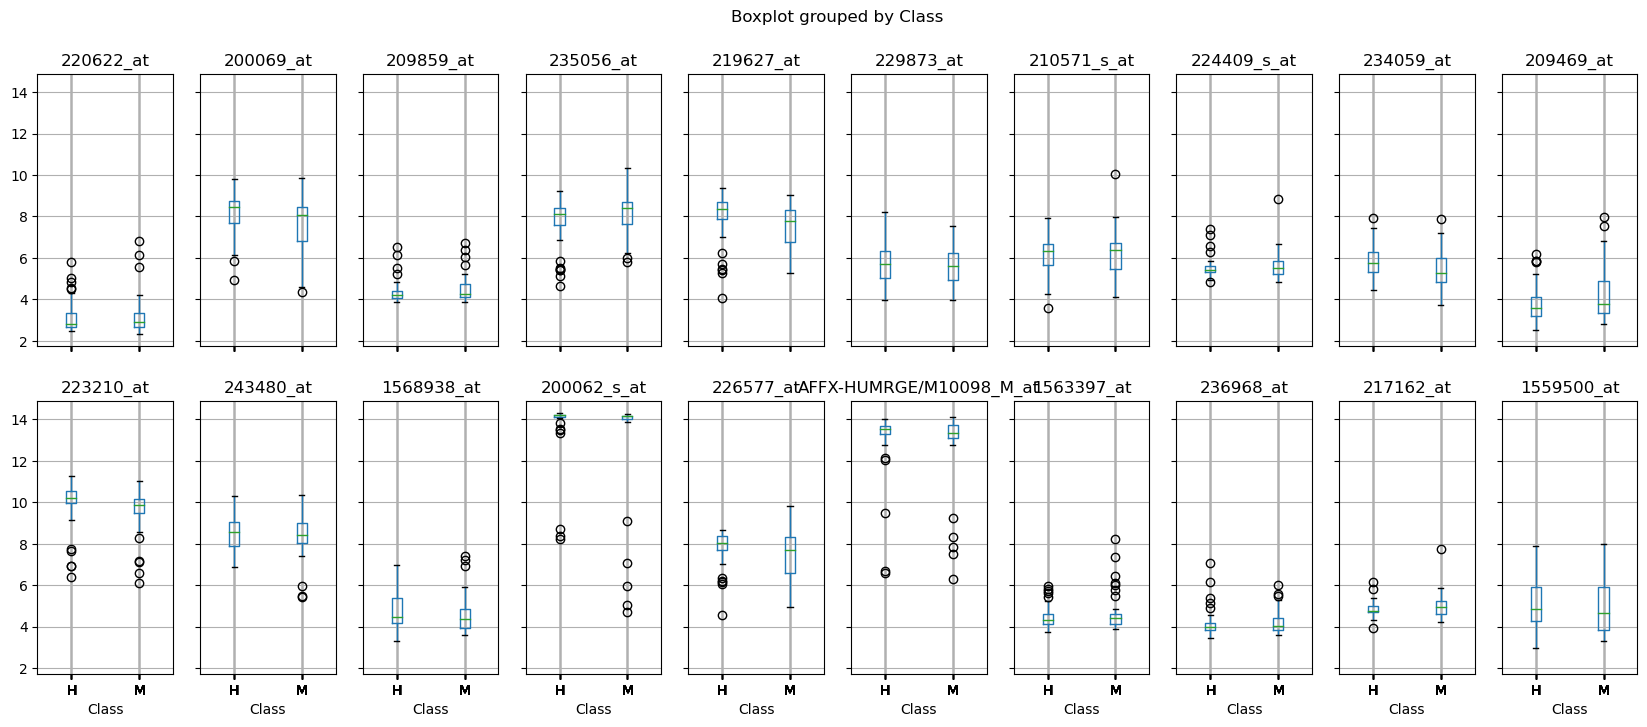

In [10]:
random_genes = list(np.random.choice(df.index[1:], 20, replace=False))
df.iloc[1:] = df.iloc[1:].apply(np.vectorize(float))
boxplot = df.T.boxplot(column=random_genes, by='Class', layout=(2,10), figsize=(20,8))

#### b. WRS for differential expression (DE)

##### 1) Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE),  what is the expected sum of ranks of g’s expression levels measured for samples labeled M?

We have 99 samples: $N=99$

We saw above that we have 49 Myocardial samples $(M)$ : $B=49$

$$
μ_T=\frac{B(N+1)}{2}=\frac{49(99+1)}{2}=2450
$$

##### 2) Denote this sum of ranks by RS(g). What is the maximal value, c, that RS(g) can take?

In order to get the maximal value they all need to be ranked last:
$$
c = \sum_{i=51}^{99}i=3675
$$

##### 3) Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

Following the previous question, to get all $M$ samples of $g$ to be in the last rank, we can do it only by ordering them in that way such that considers all of the possibilities of ordering the 49 $M$ samples within the 99 total samples.

$$
P(RS(g)=c)=\frac{1}{{N}\choose{B}} =\frac{1}{{99 \choose 49}}=1.98\times10^{-29}
$$

##### 4) Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? <br> (Provide formulas and explain them)

The only way to get $RS(g)=c-1$ is by the first rank of $M$ which is in place 50 will switch to rank 50 and there is still only one way to order those $M$ samples.

$$
P(RS(g)=c)=P(RS(g)=c-1)=\frac{1}{{99 \choose 49}}=1.98\times10^{-29}
$$

For $RS(g)=c-2$ there are 2 options:<br>
The first option is if in $M$, the sample that is ranked 51 will move 2 ranks down to 49.<br>
The second option is if in $M$, the sample that is ranked 51 will move 1 rank down to 50 and the sample that is ranked 52 will move 1 rank down to 51.

$$
P(RS(g)=c-2)=2*\frac{1}{{99 \choose 49}}=3.96\times10^{-29}
$$

##### 5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). <br> Compute the IQR for this distribution and present it on the plot with the histogram

In [11]:
df_ranks = df.copy()
df_ranks.iloc[1:] = df_ranks.iloc[1:].apply(lambda x: x.rank(ascending=False), axis=1)
sum_of_ranks = df_ranks.iloc[:,list(df_ranks.loc['Class'] == 'M')][1:].sum(axis=1)
unique_sum_of_ranks = sum_of_ranks.nunique()
bins = int(np.ceil(2 * unique_sum_of_ranks**(1/3)))
Q1 = sum_of_ranks.quantile(0.25)
Q3 = sum_of_ranks.quantile(0.75)
IQR = Q3-Q1 

print(f"Uniqe sum of ranks: {unique_sum_of_ranks}")
print(f"Bins: {bins}")
print(f"Lower quartile: {Q1}")
print(f"Upper quartile: {Q3}")
print(f"IQR: {IQR}")

Uniqe sum of ranks: 2761
Bins: 29
Lower quartile: 2275.0
Upper quartile: 2604.0
IQR: 329.0


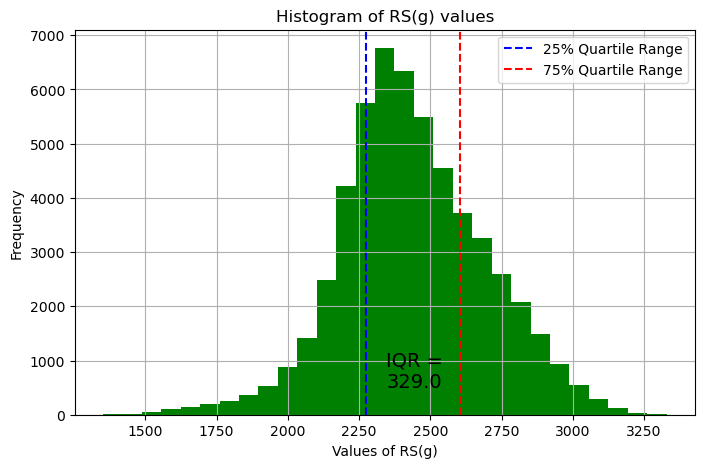

In [12]:
plt.figure(figsize=(8,5))
sum_of_ranks.hist(bins=bins, color='g')
plt.axvline(Q1, color='b', linestyle='dashed', label='25% Quartile Range')
plt.axvline(Q3, color='r', linestyle='dashed',label='75% Quartile Range')
plt.title(f'RS(g) Results Distribution - IQR: {IQR}')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Values of RS(g)')
plt.text(Q1 + 70, 500, f"IQR =\n{IQR}", color="k", fontsize=14)
plt.title('Histogram of RS(g) values')
plt.show()

#### c. Differential Expression

The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. Evaluate the DE in both one-sided directions for every gene, using both Student t-test and WRS test.

Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) 
at a p-value better than 0.07. For both directions use both a Student t-test and a WRS test.

In [13]:
# We started by separeting the 2 classes M & H into 2 dfM_df.loc[g]
M_df = df.T.groupby('Class').get_group('M').T.iloc[1:].astype(float)
H_df = df.T.groupby('Class').get_group('H').T.iloc[1:].astype(float)

In [14]:
significant = pd.DataFrame(columns=['wrs_gt', 'wrs_lt', 't_test_gt', 't_test_lt'])

In [15]:
for g in tqdm(M_df.index):
    M_vals = M_df.loc[g]
    H_vals = H_df.loc[g]
    
    significant.loc[g, 'wrs_gt'] = ranksums(M_vals, H_vals, alternative='greater')
    significant.loc[g, 'wrs_lt'] = ranksums(M_vals, H_vals, alternative='less')
    significant.loc[g, 't_test_gt'] = ttest_ind(M_vals, H_vals, alternative='greater')
    significant.loc[g, 't_test_lt'] = ttest_ind(M_vals, H_vals, alternative='less')

  0%|          | 0/54628 [00:00<?, ?it/s]

In [16]:
# Save only the p-values
stat_signif_p_values = significant.applymap(lambda x: x[1])

print('WRS Test')
print(f'Number of genes overexpressed M > H at p-value <= 0.07: {stat_signif_p_values[stat_signif_p_values["wrs_gt"] <= 0.07].shape[0]}')
print(f'Number of genes underexpressed M < H at p-value <= 0.07: {stat_signif_p_values[stat_signif_p_values["wrs_lt"] <= 0.07].shape[0]}\n')

print('Student t-test')
print(f'Number of genes overexpressed M > H at p-value <= 0.07: {stat_signif_p_values[stat_signif_p_values["t_test_gt"] <= 0.07].shape[0]}')
print(f'Number of genes underexpressed M < H at p-value <= 0.07: {stat_signif_p_values[stat_signif_p_values["t_test_lt"] <= 0.07].shape[0]}')

WRS Test
Number of genes overexpressed M > H at p-value <= 0.07: 10787
Number of genes underexpressed M < H at p-value <= 0.07: 10667

Student t-test
Number of genes overexpressed M > H at p-value <= 0.07: 8517
Number of genes underexpressed M < H at p-value <= 0.07: 8639


#### d.Correlations

Select the 80 most significant genes from each one of the onesided WRS DE lists you computed in 3c.<br> 
Generate a set of 160 genes, D, which is the union of the above two sets.

##### 1) Compute Kendall 𝜏 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap. 

In [17]:
gt_genes = list(stat_signif_p_values.nsmallest(80, columns=['wrs_gt']).index)
lt_genes = list(stat_signif_p_values.nsmallest(80, columns=['wrs_lt']).index)

signif_genes = gt_genes + lt_genes

D = df.loc[signif_genes].T.astype(float)

D_kendall = pd.DataFrame(D.corr(method='kendall').values,
                         index=D.columns,
                         columns=D.columns)

D_kendall.head()

,208869_s_at,216248_s_at,204622_x_at,244054_at,203887_s_at,203888_at,217202_s_at,203574_at,241279_at,240103_at,...,223588_at,224196_x_at,222108_at,230428_at,235310_at,235779_at,242874_at,1565882_at,224879_at,227626_at
0,,,,,,,,,,,,,,,,,,,,,
208869_s_at,1.000000,0.664399,0.617811,0.433519,0.419913,0.408369,0.475984,0.584003,0.489177,0.457019,...,-0.345702,-0.198103,-0.234385,-0.255824,-0.285920,-0.281856,-0.346526,-0.377036,-0.216656,-0.323026
216248_s_at,0.664399,1.000000,0.851165,0.448361,0.386106,0.386931,0.466089,0.555968,0.484230,0.450423,...,-0.415791,-0.264069,-0.268192,-0.289631,-0.335395,-0.349485,-0.416615,-0.401773,-0.238095,-0.417852
204622_x_at,0.617811,0.851165,1.000000,0.457019,0.373325,0.392290,0.442589,0.554731,0.450010,0.400536,...,-0.400536,-0.260359,-0.267780,-0.280148,-0.324263,-0.354845,-0.411255,-0.404659,-0.261596,-0.400124
244054_at,0.433519,0.448361,0.457019,1.000000,0.522160,0.531231,0.534529,0.562564,0.460317,0.576582,...,-0.226139,-0.401773,-0.313544,-0.297877,-0.244692,-0.308247,-0.337456,-0.261596,-0.327974,-0.340342
203887_s_at,0.419913,0.386106,0.373325,0.522160,1.000000,0.783137,0.495362,0.476397,0.468975,0.466502,...,-0.178726,-0.280973,-0.233972,-0.244692,-0.204700,-0.219588,-0.307359,-0.211709,-0.229437,-0.232736


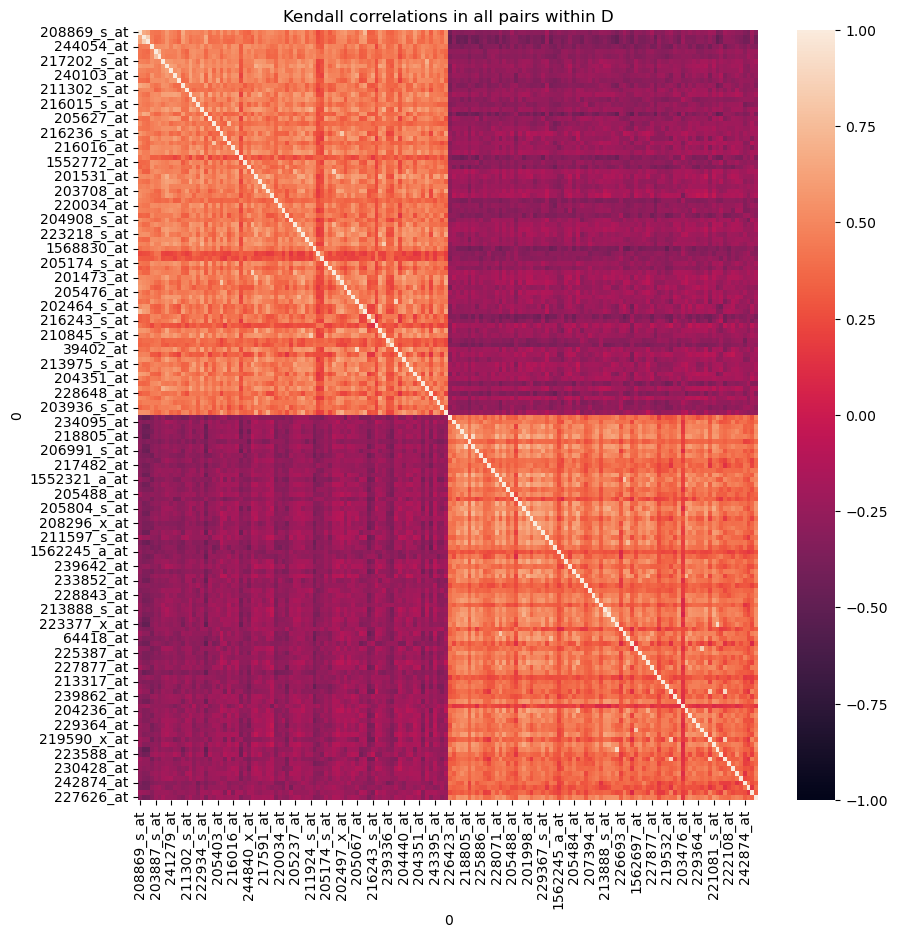

In [18]:
mask = np.zeros_like(D_kendall)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(D_kendall,vmin=-1, vmax=1)
plt.title("Kendall correlations in all pairs within D")
plt.show()

##### 2) Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜏? 

In [19]:
print(f'Mean of kendall correlations of all pairs within D: {np.round(D_kendall.stack().mean(),3)}')

Mean of kendall correlations of all pairs within D: 0.09


Under a null model that assumes that genes are pairwise independent, the expected value for the 𝜏 Kendall correlation between any two genes is 0 because the ordering of one gene does not provide any information about the ordering of another gene. 
Therefore, the correlation between any two genes, as measured by the 𝜏 Kendall correlation, would be expected to be zero on average.

##### 3) Now compute the Kendall 𝜏 correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. <br> What is the average value you observed? Compare it to the value in the above section. Explain.

In [20]:
over_D = df.loc[gt_genes].T.astype(float)

over_D_kendall = pd.DataFrame(over_D.corr(method='kendall').values,
                              index=over_D.columns,
                              columns=over_D.columns)

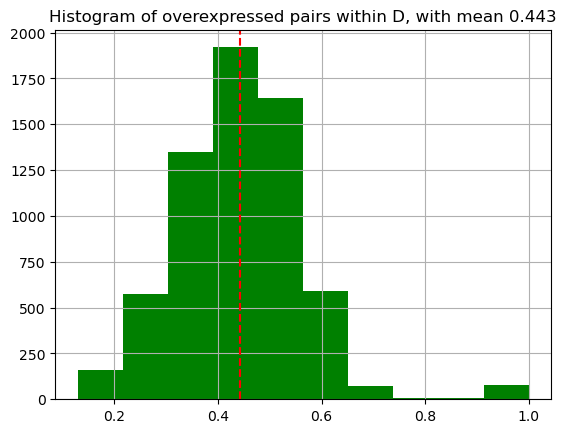

In [21]:
over_D_kendall.stack().hist(color='g')
over_D_kendal_mean = np.round(over_D_kendall.stack().mean(),3)
plt.title(f'Histogram of overexpressed pairs within D, with mean {over_D_kendal_mean}')
plt.axvline(over_D_kendal_mean, color='r', linestyle='dashed')
plt.show()

##### 4) What can you report about co-expression of genes in D (coexpression is inferred from the correlation of the expression levels of genes, across a set of samples)?

Based on the statistical test we did, we can say that there is strong evidence to suggest that there is a positive Kendall correlation coefficient between the expression levels of genes in D.
This indicates that there is a significant co-expression of genes in D, meaning that the expression levels of genes tend to vary together in a similar fashion across a set of samples.

##### 5) What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05? <br> Explain your answer.

To calculate the number of co-expressed pairs in the entire dataset at $FDR=0.05$, we should count the pairs of genes (out of all possible pairs) whose pvalue in the empirical FDR equation meets the defined FDR threshold.<br>Given that our dataset contains 54,628 distinct genes with no missing values,using the following formula:

$FDR(p) = \frac{p⋅N}{O(p)} = 0.05 $


The null model predicts that we will have ${54628 \choose 2} \cdot 0.05 ≈ 7.5 \cdot 10^7$ pairs of genes at FDR = 0.05


##### 6) What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D? 

**Advantages**:

1. By looking at all the genes in the study and computing their co-expression we could possibly discover genes that on their own don't have much significance in their expression when calculating WRS, but by looking at their correlations we could discover other interesting information.
2. Computing the co-expression for all the genes in the study will contribute access to a large part of the full population, thus it helps us in obtaining quality and precise statistical results.
3. When using all the genes in the study, we should get lower p-values for rejecting our null hypothesis, i.e. our results will be more statistically significant against the genes in D.

For example, find which genes are active simultaneously, which often indicates they are active in the same biological process, but do not normally confer information about causality or distinguish between regulatory and regulated genes.

**Disadvantages**:

1. To compute co-expression for all genes we require a lot of computing power. By using an enhanced Merge sort algorithm the complexity of kendall tau can be $O(n\log n)$, hence, going from 160 genes to all 54628 will take a lot more time.
2. Conducting multiple testing will present us with more spurious results and will lead us to misinterpretation based on the given data (although there are tools that we can use to detect these misinterpretations).
3. Visualization and inspection, it is challenging to achieve any conclusions from the visualization that contains enormous data points.

#### e. Plots and Conclusions of the DE and correlation analysis

##### 1) Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (higher expression levels in M) using WRS and t-test using the results you had computed in Section 3c.

State, for each comparison, the number of genes, k, at which we observe with an FDR threshold of:<br>
a) 𝜏 = 0.05<br>
b) 𝜏 = 0.01<br>
c) 𝜏 = 0.005<br>
If these events are not observed at any k>0, then make that statement.

In [22]:
# initial params and functions
FDR_tre_lst = [0.05, 0.01, 0.005]

def calc_FDR(threshold, p_values_list):
    N = len(p_values_list)
    for i in range(N):
        FDR = p_values_list[i] * N / (i + 1)
        if FDR > threshold:
            return i 
    return N  

In [23]:
# WRS calculation of K by threshold
wrs_over_expressed = stat_signif_p_values["wrs_gt"].tolist()
wrs_over_expressed_sorted = sorted(wrs_over_expressed)

K_values= []
for threshold in FDR_tre_lst:
    k = calc_FDR(threshold, wrs_over_expressed_sorted)
    K_values.append(k)

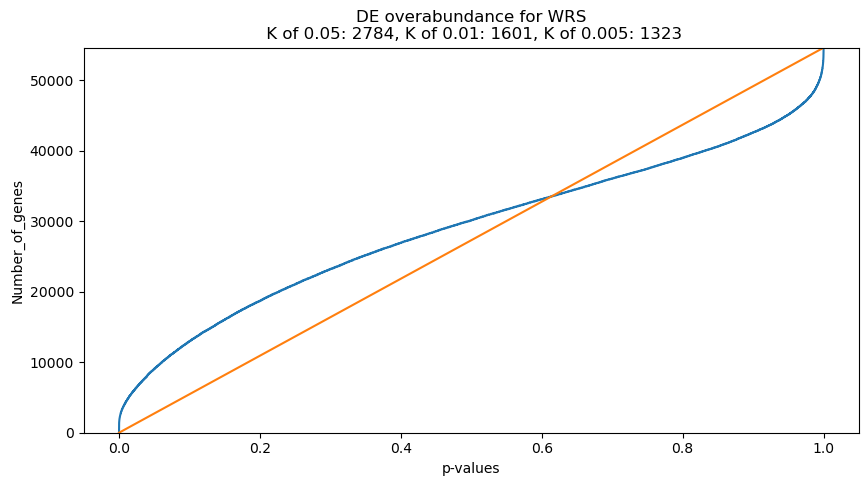

In [24]:
# plotting WRS DE overabundance
fig, ax = plt.subplots(1,figsize=(10,5))
wrs_expected_p_values = np.linspace(0, 1.0, len(wrs_over_expressed_sorted))
sns.ecdfplot(data=wrs_over_expressed_sorted,stat="count")
sns.ecdfplot(data=wrs_expected_p_values,stat="count")
plt.title(f'DE overabundance for WRS\n K of 0.05: {K_values[0]}, K of 0.01: {K_values[1]}, K of 0.005: {K_values[2]}')
plt.xlabel("p-values")
plt.ylabel('Number_of_genes')
plt.show()

In [25]:
# T-test calculation of K by threshold
ttest_over_expressed = stat_signif_p_values["t_test_gt"].tolist()
ttest_over_expressed_sorted = sorted(ttest_over_expressed)

K_values= []
for threshold in FDR_tre_lst:
    k = calc_FDR(threshold, ttest_over_expressed_sorted)
    K_values.append(k)

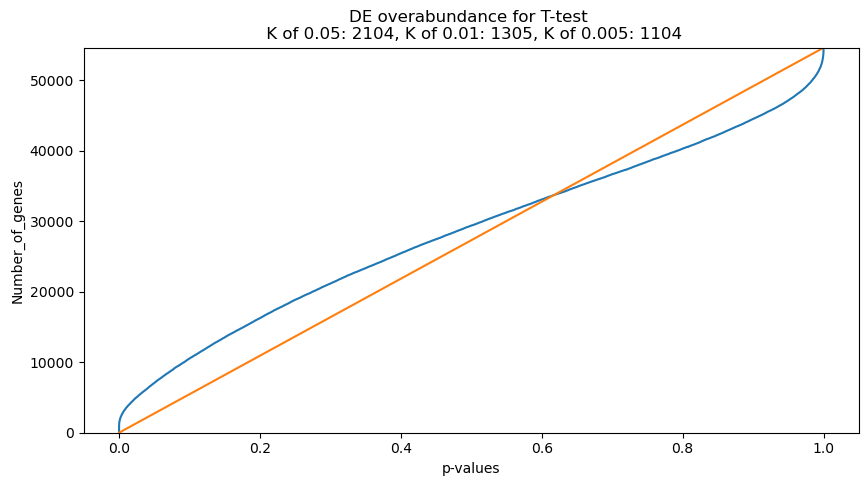

In [26]:
# plotting WRS DE overabundance
fig, ax = plt.subplots(1,figsize=(10,5))
ttest_expected_p_values = np.linspace(0, 1.0, len(ttest_over_expressed_sorted))
sns.ecdfplot(data=ttest_over_expressed_sorted,stat="count")
sns.ecdfplot(data=ttest_expected_p_values,stat="count")
plt.title(f'DE overabundance for T-test \n K of 0.05: {K_values[0]}, K of 0.01: {K_values[1]}, K of 0.005: {K_values[2]}')
plt.xlabel("p-values")
plt.ylabel('Number_of_genes')
plt.show()

##### 2) For any given gene, g, consider the following set of p-values:


𝑆(𝑔) = {𝑝(𝜆)|𝑝(𝜆) 𝑖𝑠 𝑎 𝑊𝑅𝑆 𝑝 − 𝑣𝑎𝑙𝑢𝑒 𝑓𝑜𝑟 𝑜𝑣𝑒𝑟𝑒𝑥𝑝𝑟𝑒𝑠𝑠𝑖𝑜𝑛 𝑖𝑛 𝑀 𝑎𝑓𝑡𝑒𝑟 𝑠𝑤𝑎𝑝𝑝𝑖𝑛𝑔 𝑜𝑛𝑒 𝑙𝑎𝑏𝑒𝑙}


(In the above definition 𝜆 represents a label swap – there are 99 such swaps). <br>
Let 
𝑝𝑈(𝑔) = max 𝜆 𝑆(𝑔)

In words: 𝑝𝑈(𝑔) represents the maximum p-value that could have been obtained for g, assuming a single labeling error.

a) For all genes, compute 𝑝𝑈(𝑔).<br>
b) Run the FDR procedure with 𝜏 = 0.05 using 𝑝𝑈(𝑔) (instead of the original p-values as computed in section 3e1a above). <br>
How many genes can you report now?<br>
c) What is the intersection of the genes you can report above with the results of 3e1a. Explain.<br>


Comment: The process you ran in this section yields a set of genes called Robust Differentially Expressed Genes (RDEG).

#### a) For all genes, compute 𝑝𝑈(𝑔)

After obtaining the set 𝑆(𝑔) of p-values for the gene g, we subtract 𝑝(𝜆) from the data set 𝑆(𝑔) and then take the maximum of the original set 𝑆(𝑔) and the set of swapped p-values that we computed earlier. Finally, we compute the maximum value in the set that we got. This is the value 𝑝𝑈(𝑔)

In [27]:
# In order to continue with the rest of 3E2(b+c) we determine pU_values_RDEG as follows:
wrs_over_expressed = stat_signif_p_values["wrs_gt"].tolist()
pU_values_RDEG = sorted(wrs_over_expressed)

#### b) Run the FDR procedure with 𝜏 = 0.05 using 𝑝𝑈(𝑔) (instead of the original p-values as computed in section 3e1a above). How many genes can you report now?

In [28]:
k = calc_FDR(0.05, pU_values_RDEG)
print("The number of genes with 𝜏 = 0.05 using 𝑝𝑈(𝑔): {}.".format(k))

The number of genes with 𝜏 = 0.05 using 𝑝𝑈(𝑔): 2784.


#### c) What is the intersection of the genes you can report above with the results of 3e1a. Explain

In [29]:
pU_values_of_3e1a = stat_signif_p_values["wrs_gt"].sort_values()[:2784]
df_pU_values_of_3e1a = pd.DataFrame(pU_values_of_3e1a)
df_pU_values_of_3e1a.index.rename('genes', inplace=True)

pU_values_of_3e2b = stat_signif_p_values["wrs_gt"].sort_values()[:2784]
df_pU_values_of_3e2b = pd.DataFrame(pU_values_of_3e2b)
df_pU_values_of_3e2b.index.rename('genes', inplace=True)


# intersection of the genes:
inner_genes = pd.merge(df_pU_values_of_3e1a, df_pU_values_of_3e2b, on='genes')
inner_genes

,wrs_gt_x,wrs_gt_y
genes,,
208869_s_at,7.276809e-15,7.276809e-15
216248_s_at,9.053458e-15,9.053458e-15
204622_x_at,1.002448e-13,1.002448e-13
244054_at,2.423984e-13,2.423984e-13
203887_s_at,2.686869e-13,2.686869e-13
...,...,...
204174_at,2.504803e-03,2.504803e-03
244850_at,2.504803e-03,2.504803e-03
215055_at,2.504803e-03,2.504803e-03


In [30]:
n_inner_genes = len(inner_genes)
print("The number of genes in the intersection is: {}.".format(n_inner_genes))

The number of genes in the intersection is: 2784.


##### 3) Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.


#### Graphical Representation Of The Differentially Expressed Genes
We selected 3 differentially expressed genes, from D (which was defined in 3.d), and produced a graphical representation of their expression patterns that demonstrates the observed DE.

The DE genes (using the WRS test results):
* From the <b>overexpressed</b> list:
    * 216248_s_at
    * 203888_at
* From the <b>underexpressed</b> list:
    * 206978_at

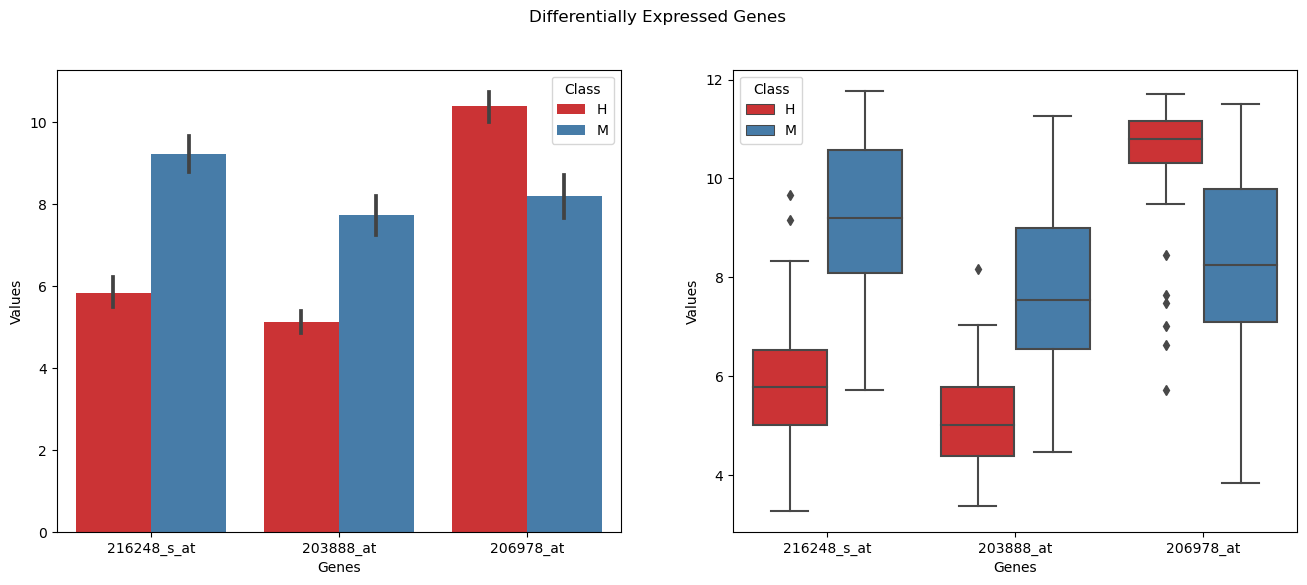

In [31]:
# set the Dataframe for these genes
df_de_genes = df.T[['216248_s_at', '203888_at', '206978_at', 'Class']]

# fix the table structure for the visualization
df_de_genes = df_de_genes.melt(id_vars=['Class'], var_name='Genes', value_name='Values')

# visualization
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16.0, 6.0))
df_de_genes['Class'] = df_de_genes['Class'].replace({0: 'H', 1: 'M'})
sns.barplot(x='Genes', y='Values', hue='Class', data=df_de_genes, palette="Set1", ax=ax1)
sns.boxplot(x='Genes', y='Values', hue='Class', data=df_de_genes, palette="Set1", ax=ax2)
f.suptitle('Differentially Expressed Genes')
plt.show()

##### 4) Heatmap
Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all
samples). <br>
Order the genes and the samples to produce the maximal visual effect.

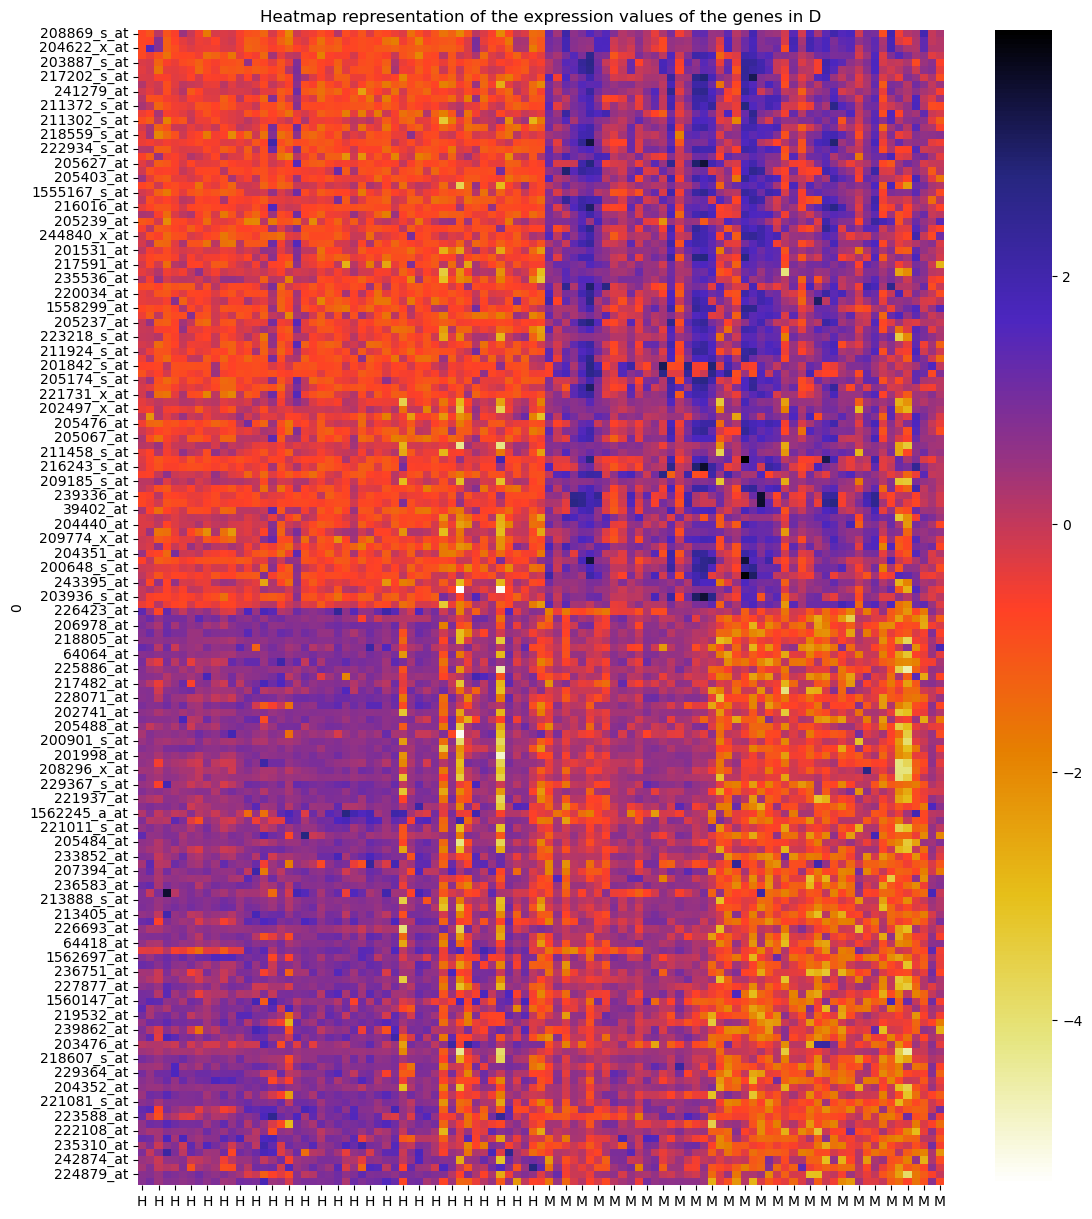

In [32]:
# We have the samples ordered by H then M
# We have the genes ordered by the overexpressed sorted then underexpressed sorted, both by p-values
# We also normalize the expression values for each gene

H_df.columns = ['H'] * H_df.shape[1]
M_df.columns = ['M'] * M_df.shape[1]

temp = pd.concat((H_df.loc[signif_genes].T, M_df.loc[signif_genes].T)).T
df_norm_row = temp.apply(lambda x: (x-x.mean())/x.std(), axis = 1)
plt.figure(figsize=(13,15))
sns.heatmap(df_norm_row, cmap='CMRmap_r')
plt.title("Heatmap representation of the expression values of the genes in D")
plt.show()